
<h1><center><font color='24568A'>sm </font></center></h1>
<h2><center><font color='24568A'>Non-use Business Case</font></center></h2>


<html>
<img src="https://pbs.twimg.com/profile_images/978254790802231297/CLl2oNdn_400x400.jpg" width="50%">
</html>



# 1. Data understanding
## 1.1 Data loading

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df2016 = pd.read_csv("C:/Users/Asus/Desktop/datasets/CDS_2016_va", encoding='windows-1252')
df2017 = pd.read_csv("C:/Users/Asus/Desktop/datasets/CDS_2017_va", encoding='windows-1252')
df2017.drop_duplicates(inplace=True)
df2018 = pd.read_csv("C:/Users/Asus/Desktop/datasets/CDS_2018_va", encoding='windows-1252')
df2019 = pd.read_csv("C:/Users/Asus/Desktop/datasets/CDS_2019_NO_LABEL", encoding='windows-1252')

## 1.2 Change name of features in Maestros

In [70]:
customers = pd.read_excel("C:/Users/Asus/Desktop/datasets/Maestros_v2.xlsx",sheet_name='Clientes') 
customers.columns=['cust_ID','latitude','longitude','auto_community','asso_ID','subAsso_ID','school_type']
courses = pd.read_excel("C:/Users/Asus/Desktop/datasets/Maestros_v2.xlsx",sheet_name='Cursos') 
courses.columns=['course_ID','course']
subjects = pd.read_excel("C:/Users/Asus/Desktop/datasets/Maestros_v2.xlsx",sheet_name='Asignaturas')
subjects.columns=['subject_ID','subject']
emt = pd.read_excel("C:/Users/Asus/Desktop/datasets/Maestros_v2.xlsx",sheet_name='TME')
emt.columns=['emt_ID','educ_material_type']
tcs = pd.read_excel("C:/Users/Asus/Desktop/datasets/Maestros_v2.xlsx",sheet_name='TS') 
tcs.columns=['support_type_ID','support_type']
language = pd.read_excel("C:/Users/Asus/Desktop/datasets/Maestros_v2.xlsx",sheet_name='Lengua') 
language.columns = ['language_ID','language']

## 1.3 Create new features to identify records from test dataset

In [71]:
df2019['Grupo Editorial'] = 0
df2019['dataset'] = 'test'
df2019.head()

,Id_Cliente,Año natural,Curso,Asignatura,Tipo Material Educativo,Lengua,Tipo Soporte Actual,Variable1,Variable2,Grupo Editorial,dataset
0,113956,2019,33,48,3,13,1,150.0,22.5150,0,test
1,113956,2019,33,65,1,26,1,90.0,22.1760,0,test
2,113956,2019,32,8,1,26,2,96.0,12.8640,0,test
3,113956,2019,32,60,1,26,2,68.0,9.1188,0,test
4,113956,2019,32,73,1,13,2,53.0,7.1020,0,test


## 1.4 Fix feature names to match all the years

In [72]:
# fix column names to match 2017 & 2018

df2016.rename(columns={'Año Natural':'Año natural',
                       'Variable 1':'Variable1',
                       'Variable 2':'Variable2'},
              inplace=True)
    

# fix columns to match format with 2016 & 2017
df2018['Curso'] = df2018['Curso'].map(lambda x: x.replace("c", "")).astype('int')

# add full year instead of just last two digits (18 -> 2018)
df2018['Año natural'] = df2018['Año natural']+2000 

## 1.5 Merge dataframes from current and previous year

In [73]:
# merging 

dfmerge1 = df2018.merge(df2017,
                        on=["Id_Cliente", "Curso", "Asignatura", "Tipo Material Educativo",
                            "Lengua", "Tipo Soporte Actual"],
                        suffixes=('_new','_old'))
dfmerge1['dataset'] = 'train'

dfmerge2 = df2017.merge(df2016,
                          on=["Id_Cliente", "Curso", "Asignatura", "Tipo Material Educativo",
                              "Lengua", "Tipo Soporte Actual"],
                          suffixes=('_new','_old'))
dfmerge2['dataset'] = 'train'

dfmerge3 = df2019.merge(df2018,
                        on=["Id_Cliente", "Curso", "Asignatura", "Tipo Material Educativo",
                            "Lengua", "Tipo Soporte Actual"],
                        suffixes=('_new','_old'))

## 1.6 Stack dataframes

In [74]:
# stacking everything

df = pd.concat([dfmerge1, dfmerge2,dfmerge3], axis=0, ignore_index=True,sort=False)


# rearranging columns

df = df[['Id_Cliente', 'Curso', 'Asignatura', 'Tipo Material Educativo', 'Lengua', 'Tipo Soporte Actual',
         'Año natural_old', 'Año natural_new',
         'Variable1_old', 'Variable1_new',
         'Variable2_old', 'Variable2_new',
         'Grupo Editorial_old', 'Grupo Editorial_new','dataset']]


## 1.7 Merging unique dataframe with information from "Maestros"

In [75]:
#merging of master dataframes with the main one
df.columns = ['cust_ID','course_ID','subject_ID','emt_ID','language_ID','support_type_ID','year_old','year_new','class_size_old','class_size_new','monetary_value_old','monetary_value_new','ed_group_old','ed_group_new','dataset']

df['cust_ID'] = df['cust_ID'].apply(str)
customers['cust_ID'] = customers['cust_ID'].apply(str)
df_merged = df.merge(customers,how='left')

df_merged['course_ID']=df_merged['course_ID'].apply(str)
df_merged.dtypes
df_merged['course_ID'] = '000'+ df_merged['course_ID']
courses['course_ID'] = courses['course_ID'].apply(str)
df_merged = df_merged.merge(courses,how='left')

df_merged['subject_ID']= df_merged['subject_ID'].apply(str)
subjects['subject_ID'] = subjects['subject_ID'].map(lambda x: int(x) if x.isdigit() else x)
subjects['subject_ID'] = subjects['subject_ID'].apply(str)
df_merged = df_merged.merge(subjects,how='left')

df_merged['emt_ID']=df_merged['emt_ID'].apply(str)
df_merged['emt_ID'] = '000'+ df_merged['emt_ID']
emt['emt_ID'] = emt['emt_ID'].apply(str)
df_merged = df_merged.merge(emt,how='left')

df_merged['support_type_ID']=df_merged['support_type_ID'].apply(str)
df_merged['support_type_ID'] = '00'+ df_merged['support_type_ID']
tcs['support_type_ID'] = tcs['support_type_ID'].apply(str)
df_merged = df_merged.merge(tcs,how='left')

df_merged['language_ID']=df_merged['language_ID'].apply(str)
language['language_ID'] = language['language_ID'].apply(str)
df_merged = df_merged.merge(language,how='left')

pd.set_option('display.max_columns', None)
df_merged.tail()

,cust_ID,course_ID,subject_ID,emt_ID,language_ID,support_type_ID,year_old,year_new,class_size_old,class_size_new,monetary_value_old,monetary_value_new,ed_group_old,ed_group_new,dataset,latitude,longitude,auto_community,asso_ID,subAsso_ID,school_type,course,subject,educ_material_type,support_type,language
1572566,212536,00036,48,0001,13,001,2018,2019,99.0,99.0,4671.81,46.7181,4,0,test,41.384132,2.046094,Cataluña,387.0,25.0,Católico,1º Bachillerato,Inglés,Básico,PAPEL,Castellano
1572567,212536,00036,42,0001,13,001,2018,2019,10.0,10.0,354.20,3.5420,2,0,test,41.384132,2.046094,Cataluña,387.0,25.0,Católico,1º Bachillerato,Griego,Básico,PAPEL,Castellano
1572568,212536,00036,8,0001,10,001,2018,2019,40.0,40.0,1413.60,14.1360,16,0,test,41.384132,2.046094,Cataluña,387.0,25.0,Católico,1º Bachillerato,Biología y geología,Básico,PAPEL,Catalán
1572569,212536,00037,48,0002,13,001,2018,2019,80.0,80.0,827.20,8.2720,4,0,test,41.384132,2.046094,Cataluña,387.0,25.0,Católico,2º Bachillerato,Inglés,Complementario,PAPEL,Castellano
1572570,212536,00037,42,0001,13,001,2018,2019,10.0,10.0,380.30,3.8030,2,0,test,41.384132,2.046094,Cataluña,387.0,25.0,Católico,2º Bachillerato,Griego,Básico,PAPEL,Castellano


## 1.8 Target variable encoding
Our target variable is defined as current sm's customers that will become non_use or not

In [76]:
#encoding of target variable
import numpy as np
df_merged['non_use'] = np.where(((df_merged['ed_group_old']==1)&(df_merged['ed_group_new']==90))&(df_merged['dataset']=='train'),1,0)

## 1.9 Creation of unique ID

In [77]:
df_merged['unique_ID'] = df_merged['cust_ID'] + df_merged['course_ID'] + df_merged['subject_ID'] + df_merged['emt_ID'] + df_merged['language_ID'] + df_merged['support_type_ID']
df_merged.head()
# df_merged['unique_ID'].nunique()
df_merged['cust_ID'].nunique()

7796

# 2. Data cleaning
## 2.1 Outliers

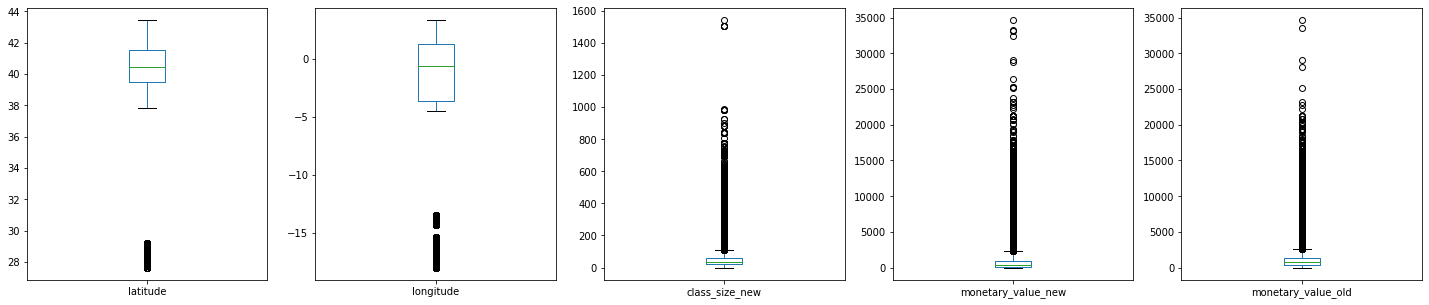

In [78]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,5, figsize=(25, 5))

df_merged['latitude'].plot(kind='box',ax=axs[0]) # outliers are true values
df_merged['longitude'].plot(kind='box',ax=axs[1]) # outliers are true values
df_merged['class_size_new'].plot(kind='box',ax=axs[2])
df_merged['monetary_value_new'].plot(kind='box',ax=axs[3])
df_merged['monetary_value_old'].plot(kind='box',ax=axs[4])
plt.show()

### latitude

In [79]:
#latitude
#given that the only outliers are Islas Canarias, we'll take those values to q1-1.5iqr but not by region, because it's
#actually a different region

q3 = df_merged['latitude'].quantile(0.75)
q1 = df_merged['latitude'].quantile(0.25)
minOut = q1 - (1.5*(q3-q1))
df_merged['latitude'] = np.where(df_merged['latitude']<minOut,minOut,df_merged['latitude'])

### longitude

In [80]:
#longitude
#given that the only outliers are Islas Canarias, we'll take those values to q1-1.5iqr but not by region, because it's
#actually a different region

q3 = df_merged['longitude'].quantile(0.75)
q1 = df_merged['longitude'].quantile(0.25)
minOut = q1 - (1.5*(q3-q1))
df_merged['longitude'] = np.where(df_merged['longitude']<minOut,minOut,df_merged['longitude'])

### class_size_new

In [81]:
#class_size_new
import warnings; warnings.simplefilter('ignore')
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

f = {'number': ['median', q1,q3]}
classByComm = df_merged.groupby('auto_community')['class_size_new'].agg(f)

#1. we'll define outliers by region. First find the q3+1.5iqr values for every autonomous community
idx = pd.IndexSlice
classByComm['number','upOutlier'] = classByComm.loc[:,idx[:,'q3']].values + 1.5 * ((classByComm.loc[:,idx[:,'q3']].values-classByComm.loc[:,idx[:,'q1']].values))
#2. now we impute q3+1.5iqr values by every autonomous community
df_merged['class_size_new'] = np.where((df_merged['class_size_new']>(classByComm.loc[:,idx[:,'upOutlier']].values)[0][0])&(df_merged['auto_community']=='Cataluña'),(classByComm.loc[:,idx[:,'upOutlier']].values)[0][0],df_merged['class_size_new'])
df_merged['class_size_new'] = np.where((df_merged['class_size_new']>(classByComm.loc[:,idx[:,'upOutlier']].values)[1][0])&(df_merged['auto_community']=='Comunidad Valenciana'),(classByComm.loc[:,idx[:,'upOutlier']].values)[1][0],df_merged['class_size_new'])
df_merged['class_size_new'] = np.where((df_merged['class_size_new']>(classByComm.loc[:,idx[:,'upOutlier']].values)[2][0])&(df_merged['auto_community']=='Islas Canarias'),(classByComm.loc[:,idx[:,'upOutlier']].values)[2][0],df_merged['class_size_new'])
df_merged['class_size_new'] = np.where((df_merged['class_size_new']>(classByComm.loc[:,idx[:,'upOutlier']].values)[3][0])&(df_merged['auto_community']=='La Rioja'),(classByComm.loc[:,idx[:,'upOutlier']].values)[3][0],df_merged['class_size_new'])
df_merged['class_size_new'] = np.where((df_merged['class_size_new']>(classByComm.loc[:,idx[:,'upOutlier']].values)[4][0])&(df_merged['auto_community']=='Madrid'),(classByComm.loc[:,idx[:,'upOutlier']].values)[4][0],df_merged['class_size_new'])
df_merged['class_size_new'] = np.where((df_merged['class_size_new']>(classByComm.loc[:,idx[:,'upOutlier']].values)[5][0])&(df_merged['auto_community']=='Navarra'),(classByComm.loc[:,idx[:,'upOutlier']].values)[5][0],df_merged['class_size_new'])
df_merged['class_size_new'] = np.where((df_merged['class_size_new']>(classByComm.loc[:,idx[:,'upOutlier']].values)[6][0])&(df_merged['auto_community']=='País Vasco'),(classByComm.loc[:,idx[:,'upOutlier']].values)[6][0],df_merged['class_size_new'])

#3. for all additional outliers we'll impute q3+1.5iqr of the whole distribution
q3 = df_merged['class_size_new'].quantile(0.75)
q1 = df_merged['class_size_new'].quantile(0.25)
maxOut = q3 + (1.5*(q3-q1))
df_merged['class_size_new'] = np.where(df_merged['class_size_new']>maxOut,maxOut,df_merged['class_size_new'])

### monetary_value

In [82]:
#monetary_value: will be imputed the same as class size by community
import warnings; warnings.simplefilter('ignore')
monetByComm = df_merged.groupby('auto_community')['monetary_value_new'].agg(f)

#1. we'll define outliers by region. First find the q3+1.5iqr values for every autonomous community
idx = pd.IndexSlice
monetByComm['number','upOutlier'] = monetByComm.loc[:,idx[:,'q3']].values + 1.5 * ((monetByComm.loc[:,idx[:,'q3']].values-monetByComm.loc[:,idx[:,'q1']].values))
#2. now we impute q3+1.5iqr values by every autonomous community
df_merged['monetary_value_new'] = np.where((df_merged['monetary_value_new']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[0][0])&(df_merged['auto_community']=='Cataluña'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[0][0],df_merged['monetary_value_new'])
df_merged['monetary_value_new'] = np.where((df_merged['monetary_value_new']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[1][0])&(df_merged['auto_community']=='Comunidad Valenciana'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[1][0],df_merged['monetary_value_new'])
df_merged['monetary_value_new'] = np.where((df_merged['monetary_value_new']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[2][0])&(df_merged['auto_community']=='Islas Canarias'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[2][0],df_merged['monetary_value_new'])
df_merged['monetary_value_new'] = np.where((df_merged['monetary_value_new']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[3][0])&(df_merged['auto_community']=='La Rioja'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[3][0],df_merged['monetary_value_new'])
df_merged['monetary_value_new'] = np.where((df_merged['monetary_value_new']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[4][0])&(df_merged['auto_community']=='Madrid'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[4][0],df_merged['monetary_value_new'])
df_merged['monetary_value_new'] = np.where((df_merged['monetary_value_new']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[5][0])&(df_merged['auto_community']=='Navarra'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[5][0],df_merged['monetary_value_new'])
df_merged['monetary_value_new'] = np.where((df_merged['monetary_value_new']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[6][0])&(df_merged['auto_community']=='País Vasco'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[6][0],df_merged['monetary_value_new'])

#3. for all additional outliers we'll impute q3+1.5iqr of the whole distribution
q3 = df_merged['monetary_value_new'].quantile(0.75)
q1 = df_merged['monetary_value_new'].quantile(0.25)
maxOut = q3 + (1.5*(q3-q1))
df_merged['monetary_value_new'] = np.where(df_merged['monetary_value_new']>maxOut,maxOut,df_merged['monetary_value_new'])

In [83]:
#monetary_value: will be imputed the same as class size by community
import warnings; warnings.simplefilter('ignore')
monetByComm = df_merged.groupby('auto_community')['monetary_value_old'].agg(f)

#1. we'll define outliers by region. First find the q3+1.5iqr values for every autonomous community
idx = pd.IndexSlice
monetByComm['number','upOutlier'] = monetByComm.loc[:,idx[:,'q3']].values + 1.5 * ((monetByComm.loc[:,idx[:,'q3']].values-monetByComm.loc[:,idx[:,'q1']].values))
#2. now we impute q3+1.5iqr values by every autonomous community
df_merged['monetary_value_old'] = np.where((df_merged['monetary_value_old']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[0][0])&(df_merged['auto_community']=='Cataluña'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[0][0],df_merged['monetary_value_old'])
df_merged['monetary_value_old'] = np.where((df_merged['monetary_value_old']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[1][0])&(df_merged['auto_community']=='Comunidad Valenciana'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[1][0],df_merged['monetary_value_old'])
df_merged['monetary_value_old'] = np.where((df_merged['monetary_value_old']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[2][0])&(df_merged['auto_community']=='Islas Canarias'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[2][0],df_merged['monetary_value_old'])
df_merged['monetary_value_old'] = np.where((df_merged['monetary_value_old']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[3][0])&(df_merged['auto_community']=='La Rioja'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[3][0],df_merged['monetary_value_old'])
df_merged['monetary_value_old'] = np.where((df_merged['monetary_value_old']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[4][0])&(df_merged['auto_community']=='Madrid'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[4][0],df_merged['monetary_value_old'])
df_merged['monetary_value_old'] = np.where((df_merged['monetary_value_old']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[5][0])&(df_merged['auto_community']=='Navarra'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[5][0],df_merged['monetary_value_old'])
df_merged['monetary_value_old'] = np.where((df_merged['monetary_value_old']>(monetByComm.loc[:,idx[:,'upOutlier']].values)[6][0])&(df_merged['auto_community']=='País Vasco'),(monetByComm.loc[:,idx[:,'upOutlier']].values)[6][0],df_merged['monetary_value_old'])

#3. for all additional outliers we'll impute q3+1.5iqr of the whole distribution
q3 = df_merged['monetary_value_old'].quantile(0.75)
q1 = df_merged['monetary_value_old'].quantile(0.25)
maxOut = q3 + (1.5*(q3-q1))
df_merged['monetary_value_old'] = np.where(df_merged['monetary_value_old']>maxOut,maxOut,df_merged['monetary_value_old'])

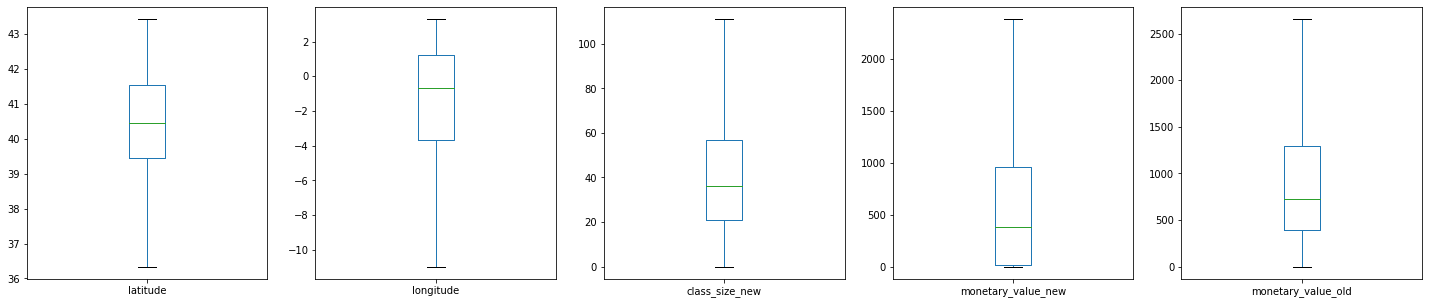

In [84]:
#features' distribution after removing outliers
fig, axs = plt.subplots(1,5, figsize=(25, 5))

df_merged['latitude'].plot(kind='box',ax=axs[0]) # outliers are true values
df_merged['longitude'].plot(kind='box',ax=axs[1]) # outliers are true values
df_merged['class_size_new'].plot(kind='box',ax=axs[2])
df_merged['monetary_value_new'].plot(kind='box',ax=axs[3])
df_merged['monetary_value_old'].plot(kind='box',ax=axs[4])
plt.show()

## 2.2 Missing values

In [85]:
df_merged['asso_ID']=df_merged.groupby('auto_community').asso_ID.transform(lambda x: x.fillna(x.mode()[0]))
df_merged['subAsso_ID']=df_merged.groupby(['auto_community','asso_ID']).subAsso_ID.transform(lambda x: x.fillna(x.mode()[0]))

df_merged[df_merged['subject'].isna()]
df_merged['subject']=df_merged.groupby(['auto_community','educ_material_type','school_type','course']).subject.transform(lambda x: x.fillna(x.mode()[0]))

# 3. Feature engineering
##  3.1 Feature creation

In [86]:
df_merged['period'] = df_merged['year_old'].astype(str) + ' - ' + df_merged['year_new'].astype(str)
df_merged['stays'] = np.where(((df_merged['ed_group_old']==1)&(df_merged['ed_group_new']==1))&(df_merged['dataset']=='train'),1,0)
df_merged = df_merged[(df_merged['dataset']=='test')|((df_merged['stays']==1)&(df_merged['dataset']=='train'))|((df_merged['non_use']==1)&(df_merged['dataset']=='train'))]

print('# rows in train set for customers staying: ' + format(len((df_merged[(df_merged['non_use']==0)&(df_merged['dataset']=='train')]))))
print('# rows in train set for customers changing to non-use: ' + format(len(df_merged[df_merged['non_use']==1])))

# rows in train set for customers staying: 105810
# rows in train set for customers changing to non-use: 6926


In [87]:
# subjects binning

subject_dict = {
    'Alternativa Religión' : "Religion",
    'Biblias escolares' : "Religion",
    'Pastoral' : "Religion",
    'Religión' : "Religion",
    'Ciencias para el mundo contemp' : "philosophy",
    'Filosofía' : "philosophy",
    'Matemáticas' : "math",
    'Matemáticas (Ciencias Naturale' : "math",
    'Matemáticas (Ciencias Sociales' : "math",
    'Biology and Geology' : "nat science",
    'Biología' : "nat science",
    'Biología y geología' : "nat science",
    'Ciencias de la naturaleza' : "nat science",
    'Ciencias de la tierra y medio' : "nat science",
    'Conocimiento del medio' : "nat science",
    'Física' : "nat science",
    'Física y química' : "nat science",
    'Natural Science' : "nat science",
    'Sciences Naturelles' : "nat science",
    'Science' : "nat science",
    'Plástica' : "nat science",
    'Química' : "nat science",
    'Informática' : "tech",
    'Tecnology' : "tech",
    'Tecnología' : "tech",
    'Tecnologías de la información' : "tech",
    'Tecnologia Industrial' : "tech",
    'Conviure' : "civic",
    'Educación para la ciudadanía' : "civic",
    'Valores sociales y cívicos' : "civic",
    'Ciencias sociales' : "social science",
    'Cultura Científica' : "social science",
    'Cultura clásica' : "social science",
    'Economía' : "social science",
    'Geografía' : "social science",
    'Geografía e historia' : "social science",
    'Geography and History' : "social science",
    'Historia' : "social science",
    'Historia del arte' : "social science",
    'Sciences Sociales' : "social science",
    'Social Science' : "social science",
    'Comprensión Lectora' : "language",
    'Lengua autonómica' : "language",
    'Lengua castellana' : "language",
    'Lectoescritura' : "language",
    'Literatura' : "language",
    'Francés' : "language",
    'Griego' : "language",
    'Inglés' : "language",
    'Latín' : "language",
    'Arts & Crafts' : "art",
    'Dibujo técnico' : "art",
    'Music' : "art",
    'Música' : "art",
    'Visual Arts' : "art",  
    'Agenda' : "Other",
    'Plan lector' : "Other",
    'Diccionarios Escolares' : "Other",
    'Proyectos' : "Other",
    'Publicaciones generales' : "Other",
    'Vacaciones' : "Other",
    'Aprendizajes básicos' : "Other",
    'Competencias básicas' : "Other",
    'Physical Education' : "Other",
    'Educación Física' : "Other",
    'Educación emocional' : "Other",
    'Grafomotricidad' : "Other",
    'Inteligencias múltiples' : "Other",
    'PAI' : "Other",
    'PAM' : "Other",
    'PMAR (Social)' : "Other",
    'PMAR (Técnico)' : "Other",
    'Áreas integradas' : "Other",
    'Áreas integradas - Unidades te' : "Other",
}

df_merged['subject_type'] = df_merged['subject'].replace(subject_dict).astype('category')


In [88]:
#courses binning
course_dict = {   
    '4º Secundaria' : "secondary",
    '2º Secundaria' : "secondary",
    '3º Secundaria' : "secondary",
    '1º Secundaria' : "secondary",   
    '1º Bachillerato' : "post secondary",
    '2º Bachillerato' : "post secondary",
    '3º Primaria' : "primary",
    '2º Primaria' : "primary",
    '1º Primaria' : "primary",
    '5 años' : "infant school",
    '4 años' : "infant school",
    '5º Primaria' : "primary",
    '4º Primaria' : "primary",
    '6º Primaria' : "primary",
    '3 años' : "infant school",
    '2 años' : "infant school",
    '1 año' : "infant school",
    '0 años' : "infant school"}
    

df_merged['course_type'] = df_merged['course'].replace(course_dict).astype('category')


In [89]:
# adding associations and subassociations that are highly related to the target variable
df_merged['asso_ID'] = df_merged['asso_ID'].astype('category')
df_merged['subAsso_ID'] = df_merged['subAsso_ID'].astype('category')

df_merged['asso_106'] = np.where(df_merged['asso_ID']=='106',1,0)
df_merged['asso_108'] = np.where(df_merged['asso_ID']=='108',1,0)
df_merged['asso_111'] = np.where(df_merged['asso_ID']=='111',1,0)
df_merged['asso_126'] = np.where(df_merged['asso_ID']=='126',1,0)
df_merged['asso_132'] = np.where(df_merged['asso_ID']=='132',1,0)
df_merged['subAsso_109'] = np.where(df_merged['asso_ID']=='109',1,0)


## 3.2 Dimensionality reduction

In [91]:
#dataframe for model
df_merged.columns
df_filtered = df_merged[['unique_ID', 'class_size_new', 'monetary_value_old','monetary_value_new', 'latitude', 'longitude',
       'auto_community', 'school_type', 'course','subject_type',
       'educ_material_type', 'support_type', 'language','non_use','dataset']]
df_filtered.head(1)

,unique_ID,class_size_new,monetary_value_old,monetary_value_new,latitude,longitude,auto_community,school_type,course,subject_type,educ_material_type,support_type,language,non_use,dataset
6,1139560003279000126002,96.0,1045.2,1286.4,42.852859,-2.668525,País Vasco,Católico,1º Secundaria,Religion,Básico,DIGITAL,Euskera,0,train


In [92]:
df_filtered.set_index('unique_ID',inplace=True)
df_filtered.head(1)

,class_size_new,monetary_value_old,monetary_value_new,latitude,longitude,auto_community,school_type,course,subject_type,educ_material_type,support_type,language,non_use,dataset
unique_ID,,,,,,,,,,,,,,
1139560003279000126002,96.0,1045.2,1286.4,42.852859,-2.668525,País Vasco,Católico,1º Secundaria,Religion,Básico,DIGITAL,Euskera,0,train


## 4. Handling imbalanced dataset

In [93]:
from sklearn.utils import resample
categorical_transformed_trainDF = df_filtered[df_filtered['dataset']=='train']
categorical_transformed_testDF = df_filtered[df_filtered['dataset']=='test']

# Separate majority and minority classes
df_majority = categorical_transformed_trainDF[categorical_transformed_trainDF.non_use==0]
df_minority = categorical_transformed_trainDF[categorical_transformed_trainDF.non_use==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=35000,    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
categorical_transformed_trainDF = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
categorical_transformed_trainDF.non_use.value_counts()

0    105810
1     35000
Name: non_use, dtype: int64

# 5. Preparing datasets for prediction

In [94]:

y_train_complete = categorical_transformed_trainDF['non_use']
drops = ['non_use','dataset']
categorical_ohe_train = categorical_transformed_trainDF.loc[:,~categorical_transformed_trainDF.columns.isin(drops)]
categorical_ohe_test = categorical_transformed_testDF.loc[:,~categorical_transformed_testDF.columns.isin(drops)]
X_train_complete = pd.get_dummies(categorical_ohe_train) 
X_test_complete = pd.get_dummies(categorical_ohe_test)
trainIndex = X_train_complete.index
X_test_complete_common= X_test_complete[X_test_complete.index.isin(trainIndex)]
X_train_complete.head()

,class_size_new,monetary_value_old,monetary_value_new,latitude,longitude,auto_community_Cataluña,auto_community_Comunidad Valenciana,auto_community_Islas Canarias,auto_community_La Rioja,auto_community_Madrid,auto_community_Navarra,auto_community_País Vasco,school_type_Católico,school_type_Privado,school_type_Público,course_0 años,course_1 año,course_1º Bachillerato,course_1º Primaria,course_1º Secundaria,course_2 años,course_2º Bachillerato,course_2º Primaria,course_2º Secundaria,course_3 años,course_3º Primaria,course_3º Secundaria,course_4 años,course_4º Primaria,course_4º Secundaria,course_5 años,course_5º Primaria,course_6º Primaria,subject_type_Other,subject_type_Plan lector Loran,subject_type_Proyectos bilingüe,subject_type_Religion,subject_type_art,subject_type_civic,subject_type_language,subject_type_math,subject_type_nat science,subject_type_philosophy,subject_type_social science,subject_type_tech,subject_type_Áreas integradas bilingüe,educ_material_type_Básico,educ_material_type_Complementario,educ_material_type_Cuaderno asociado,educ_material_type_Prescribible,support_type_DIGITAL,support_type_PAPEL,language_Castellano,language_Catalán,language_Euskera,language_Valenciano
unique_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1139560003279000126002,96.0,1045.2,1286.4,42.852859,-2.668525,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1139560003279000113002,53.0,804.0,710.2,42.852859,-2.668525,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1139560003260000113002,81.0,1018.4,1085.4,42.852859,-2.668525,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1139560003260000126002,68.0,0.0,911.2,42.852859,-2.668525,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1139580002754000213001,26.0,90.0,130.0,42.853774,-2.391622,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


# 6. Classifier

In [95]:
#some functions
import itertools
from collections import defaultdict
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix_model(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes.tolist(), rotation=45)
    plt.yticks(tick_marks, classes.tolist())
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlim(-0.5, len(classes)-0.5)
    plt.ylim(len(classes)-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 6.1 Baseline Random Forest

0.9530858375024633

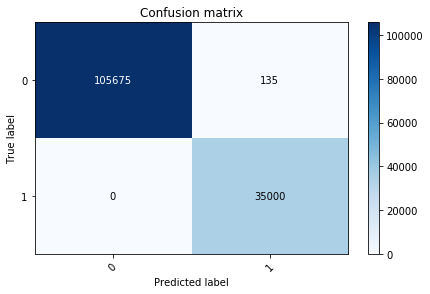

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

sm_rf = RandomForestClassifier(n_jobs=-1,random_state=42,class_weight="balanced")

sm_rf.fit(X_train_complete,y_train_complete)
predictionsRFCV_train = sm_rf.predict(X_train_complete)

predictionsRFCV_train = predictionsRFCV_train.round()
predictionsRFCV_train_DF = pd.DataFrame(predictionsRFCV_train, columns=['prediction'])
conf_mat_dt_RFCV_train = confusion_matrix(y_train_complete,predictionsRFCV_train_DF)

plot_confusion_matrix_model(conf_mat_dt_RFCV_train,predictionsRFCV_train_DF['prediction'].unique(),cmap=plt.cm.Blues)

scores = cross_val_score(sm_rf, X_train_complete, y_train_complete, cv = 5, scoring='f1')
scores.mean()

## 6.2 Randomized search for parameters

In [36]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': randint(130, 145),
         'max_features':['sqrt','auto']}
         


search = RandomizedSearchCV(sm_rf, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=6, return_train_score=True)
search.fit(X_train_complete, y_train_complete)

print("Best parameters set found on development set:")
print()
print(search.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 27.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 63.9min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 115.0min
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed: 146.0min finished


Best parameters set found on development set:

{'max_features': 'sqrt', 'n_estimators': 144}


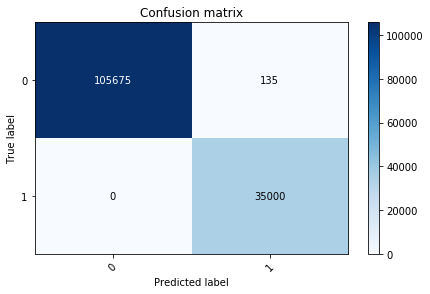

In [97]:
predictionsRFDF_train_search = pd.DataFrame(search.best_estimator_.predict(X_train_complete),columns=['prediction'])
conf_mat_dt_RFCV_train_search = confusion_matrix(y_train_complete,predictionsRFDF_train_search.round())
plot_confusion_matrix_model(conf_mat_dt_RFCV_train_search, predictionsRFDF_train_search['prediction'].round().unique(),cmap=plt.cm.Blues)


## 6.3 Selecting most important features

In [98]:
#most important features
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

feat_labels = list(X_train_complete.columns.values)
for feature in zip(feat_labels, sm_rf.feature_importances_):
    print(feature)
    
sfm = SelectFromModel(sm_rf, threshold=0.008)
sfm.fit(X_train_complete, y_train_complete)

('class_size_new', 0.11640573688652087)
('monetary_value_old', 0.1399230387942229)
('monetary_value_new', 0.1369146289368678)
('latitude', 0.12477188508461343)
('longitude', 0.12472276807449365)
('auto_community_Cataluña', 0.0032221585927927707)
('auto_community_Comunidad Valenciana', 0.004629031643958224)
('auto_community_Islas Canarias', 0.004378283924960716)
('auto_community_La Rioja', 0.0026863381665955975)
('auto_community_Madrid', 0.006146861329713729)
('auto_community_Navarra', 0.004597321530544251)
('auto_community_País Vasco', 0.002897370463117785)
('school_type_Católico', 0.011083287144819941)
('school_type_Privado', 0.008358521739392631)
('school_type_Público', 0.01123389665428875)
('course_0 años', 1.1172853358803218e-05)
('course_1 año', 6.291609164789564e-05)
('course_1º Bachillerato', 0.006210302047182621)
('course_1º Primaria', 0.0102277446385983)
('course_1º Secundaria', 0.0057149260249135005)
('course_2 años', 0.00022083218753728273)
('course_2º Bachillerato', 0.00621

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight='balanced',
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=Fa

0.9516919293837915


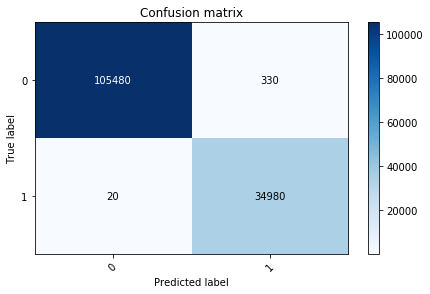

In [99]:
# model with modified dataset to only use important features and avoid overfitting
X_important_train = sfm.transform(X_train_complete)
X_important_test = sfm.transform(X_test_complete_common)

sm_rf_important = RandomForestClassifier(class_weight="balanced",n_jobs=-1,random_state=42,
                                        max_features= 'sqrt', n_estimators= 144)

sm_rf_important.fit(X_important_train, y_train_complete)
scoresImportant = cross_val_score(sm_rf_important, X_important_train, y_train_complete, cv = 5, scoring='f1')
print(scoresImportant.mean())

predictionsRFDF_train_important = pd.DataFrame(sm_rf_important.predict(X_important_train),columns=['prediction'])
conf_mat_dt_RFCV_train_important = confusion_matrix(y_train_complete,predictionsRFDF_train_important.round())
plot_confusion_matrix_model(conf_mat_dt_RFCV_train_important, predictionsRFDF_train_important['prediction'].round().unique(),cmap=plt.cm.Blues)


# 7. Setting a threshold for reducing false negatives

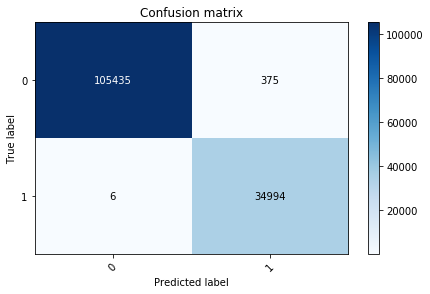

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV


threshold = 0.45
predictionsRFCV_train_thresh = pd.DataFrame(sm_rf_important.predict_proba(X_important_train))
predictionsRFCV_train_thresh_DF = pd.DataFrame(np.where(predictionsRFCV_train_thresh[1]>threshold,1,0), columns=['prediction'])
conf_mat_dt_RFCV_train_thresh = confusion_matrix(y_train_complete,predictionsRFCV_train_thresh_DF)
conf_mat_dt_RFCV_train_thresh
plot_confusion_matrix_model(conf_mat_dt_RFCV_train_thresh,predictionsRFCV_train_thresh_DF['prediction'].unique(),cmap=plt.cm.Blues)


## 8. Making predictions
The predictions for Datathon were not made with the threshold because we believe this is a business decision to take in sm.

In [102]:
predictionsRFCV_test_DF = pd.DataFrame(sm_rf_important.predict(X_important_test),columns=['prediction'])
predictionsRFCV_test_DF.index = X_test_complete_common.index
predictionsRFCV_test_DF.to_csv('C:/Users/Asus/Downloads/predictionsSM.csv')

In [104]:
X_test_complete_common.to_csv('C:/Users/Asus/Downloads/X_important_test.csv')